In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                         # plotting
import seaborn as sn  
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn import neighbors               # includes kNN!
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from random import randrange
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

# names=['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom'], delimiter=','
emc_gam  = pd.read_csv("https://drive.google.com/uc?export=download&id=1TvbbCV-kJeNMuIORMyiMFgH_u_CQSZhX")
emc_neutron = pd.read_csv("https://drive.google.com/uc?export=download&id=1bY6ZPF3WLxfviYSSViuw1SEx1_sWxP46")

# This is needed for training the model. It has to know if it's right.
emc_gam["type"] = 1
emc_neutron["type"] = 0

# Shove them into one big dataset for faster plotting.
dataset = pd.concat([emc_gam, emc_neutron],ignore_index=True)


print(dataset)

             Th          Ph         E  NrHits  NrBumps        E1      E1E9  \
0       50.8457   -0.008022  1.673710      19        1  1.055470  0.667862   
1       22.9273 -119.515000  4.698040      19        1  2.908490  0.641230   
2      130.3010 -126.725000  2.773130      17        1  1.826860  0.680077   
3      160.2830   59.330500  3.099390      20        1  2.171110  0.735619   
4       89.4000  -15.521300  3.194310      21        1  2.400890  0.774224   
...         ...         ...       ...     ...      ...       ...       ...   
86867  125.2240  -51.632400  0.646651      11        1  0.406012  0.661388   
86868   48.2575   23.305300  1.096160      19        1  0.514298  0.558028   
86869   92.8038  -43.532700  0.995061      15        1  0.423894  0.457717   
86870  119.4840  128.111000  0.229870      14        1  0.076507  0.492713   
86871  109.1130 -171.772000  0.437142       9        1  0.187270  0.483033   

          E9E25       Z20       Z53    LatMom  type  
0      0.

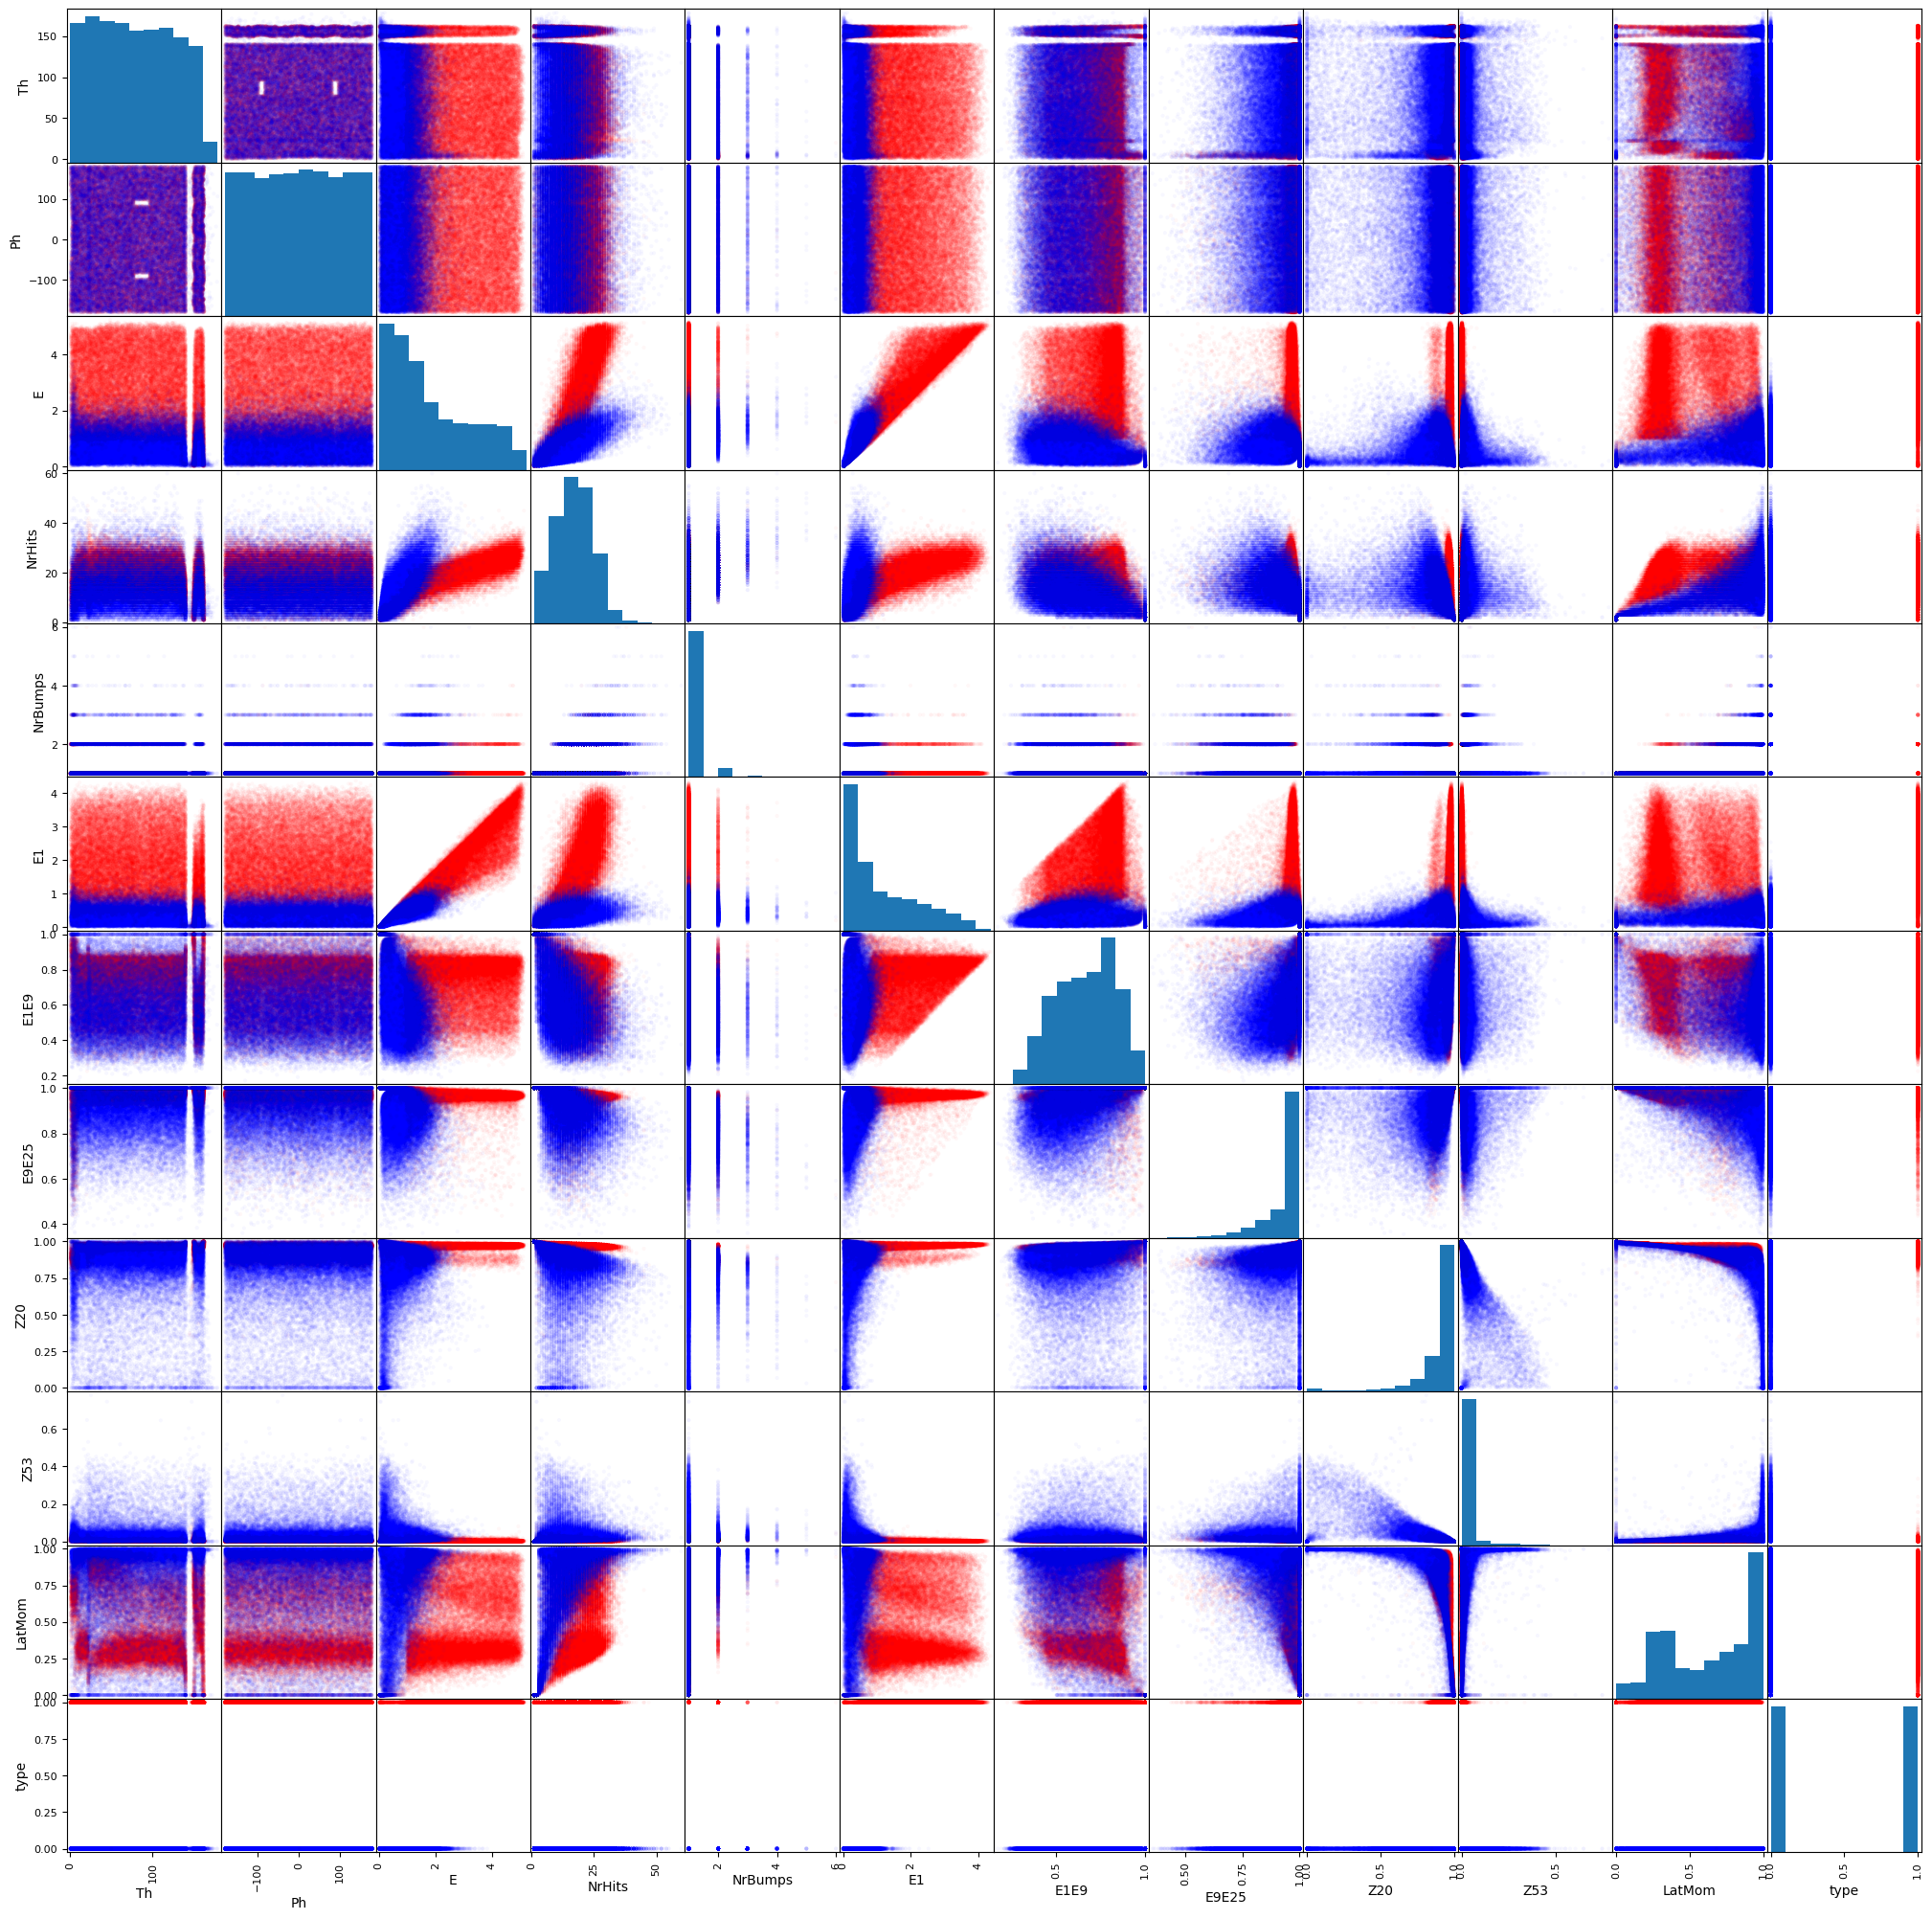

In [ ]:
# #rrggbb in hex
colors = ["#ff0000", "#0000ff"]

# if i>len(emc_gam) we are plotting the emc_neutron and this expression evalues to False, which is just 0. 
# It will have colors[0] if True then colors[1]
something = pd.plotting.scatter_matrix(dataset, figsize=(25,25), diagonal='hist', alpha=0.03, color = [colors[i>len(emc_gam)] for i in range(len(dataset))])


plt.show()

From our observations we can conclude that the paramters which were more relevant were E, E1, E1E9, E9E25, Z20, LatMom, NrHits, as they were the ones with less correlation. We therefore decided to study the correlation between this paramters and see how they relate with each other. 

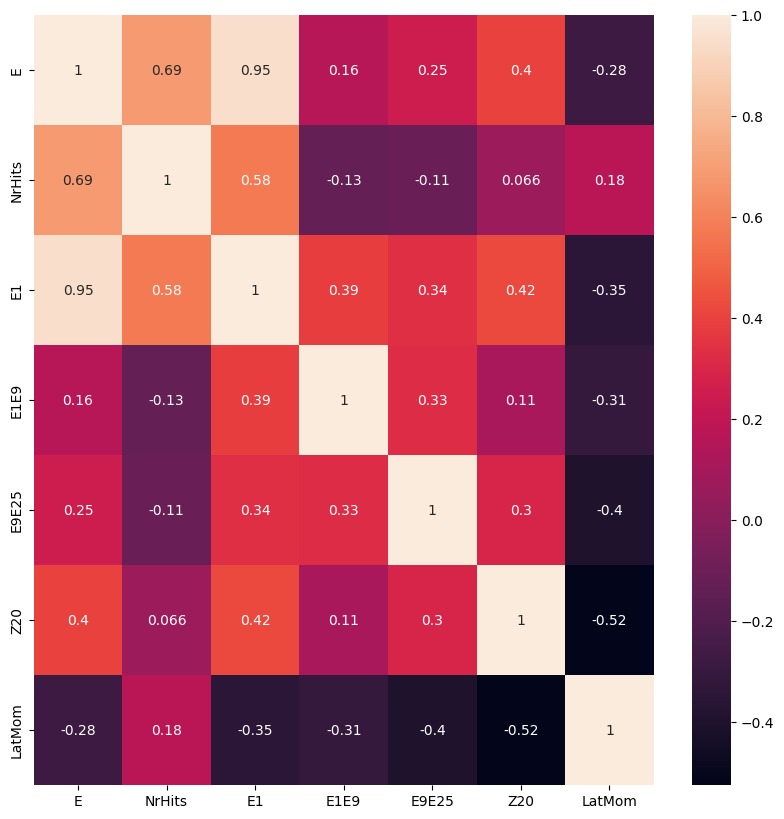

In [ ]:

correlation_matrix = dataset[['E','NrHits','E1','E1E9','E9E25', 'Z20','LatMom' ]].corr()
plt.figure(figsize=(10, 10))
sn.heatmap(correlation_matrix, annot=True)
plt.show()

 The matric abouve shows the correlation relation betweewn paramters. 
 If 2 paramters have a high correlation( ie. 1), then the data for both will be the same, hence the infmation provided by both will be irrelevant as just the data set from 1 parameter will be enough as it will reduce the possibiloty of maximizing FOM. 
 From the correlation matrix, we can convlude that there is a strong relation (0.95) between E and E1 fro both enutron and gamma rays. We can also see that E against NrHits have a high correlation (0.69).

In [ ]:
emc_gam[['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom']].describe()


,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,43360.000000,4.336000e+04,43360.000000
mean,80.749479,-0.410604,2.902359,19.744211,1.022163,1.967300,0.716676,0.963544,0.968002,2.808279e-03,0.482873
std,46.762866,103.996747,1.179884,5.893862,0.154851,0.900559,0.140513,0.036491,0.023344,4.033629e-03,0.244087
min,0.595195,-179.986000,0.025090,1.000000,1.000000,0.014021,0.224754,0.436667,0.350785,1.054230e-50,0.000000
25%,40.473675,-90.818675,1.905425,16.000000,1.000000,1.232017,0.620547,0.960356,0.966239,1.281237e-03,0.288124
50%,79.210700,-0.410285,2.895825,20.000000,1.000000,1.882490,0.754330,0.968749,0.972596,2.097985e-03,0.384048
75%,119.839750,88.966775,3.916097,24.000000,1.000000,2.640420,0.826166,0.976497,0.977766,3.251785e-03,0.700759
max,163.211000,179.958000,5.234740,47.000000,6.000000,4.369720,1.000000,1.000000,1.000000,3.341460e-01,0.996175


In [ ]:
emc_neutron[['Th','Ph','E','NrHits','NrBumps','E1','E1E9','E9E25','Z20','Z53','LatMom']].describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
count,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000,43512.000000
mean,78.625170,0.705105,0.760000,13.929376,1.122564,0.341868,0.612911,0.893528,0.809153,0.034600,0.769180
std,47.212387,103.985196,0.502411,8.012129,0.381821,0.229777,0.176559,0.101082,0.209241,0.056912,0.276143
min,0.499105,-180.001000,0.024076,1.000000,1.000000,0.006992,0.171400,0.356098,0.000000,0.000000,0.000000
25%,37.196675,-89.329050,0.366767,8.000000,1.000000,0.168263,0.477409,0.838244,0.780413,0.007268,0.649031
50%,76.319900,1.788705,0.666409,13.000000,1.000000,0.299559,0.595015,0.916345,0.879204,0.016139,0.899504
75%,118.370000,90.577475,1.054273,19.000000,1.000000,0.467397,0.735480,0.976849,0.934041,0.034914,0.973680
max,178.647000,180.000000,3.832530,60.000000,6.000000,2.533030,1.000000,1.000000,1.000000,0.779841,0.999937


In [2]:
#scaler = StandardScaler()

#scaled_data = scaler.fit_transform(dataset)
#print(np.mean(scaled_data,axis=0),np.std(scaled_data,axis=0))

dataset['E'] = ( dataset.E - dataset.E.mean() ) / dataset.E.std()
dataset['E1']        = ( dataset.E1        - dataset.E1.mean() )        / dataset.E1.std()
dataset['NrHits']     = ( dataset.NrHits     - dataset.NrHits.mean() )     / dataset.NrHits.std()
dataset['E1E9']       = ( dataset.E1E9       - dataset.E1E9.mean() )       / dataset.E1E9.std()

dataset['Th']       = ( dataset.Th       - dataset.Th.mean() )       / dataset.Th.std()
dataset['Ph']       = ( dataset.Ph       - dataset.Ph.mean() )       / dataset.Ph.std()
dataset['NrBumps']       = ( dataset.NrBumps       - dataset.NrBumps.mean() )       / dataset.NrBumps.std()
dataset['E9E25']       = ( dataset.E9E25       - dataset.E9E25.mean() )       / dataset.E9E25.std()
dataset['Z20']       = ( dataset.Z20       - dataset.Z20.mean() )       / dataset.Z20.std()
dataset['Z53']       = ( dataset.Z53       - dataset.Z53.mean() )       / dataset.Z53.std()
dataset['LatMom']       = ( dataset.LatMom       - dataset.LatMom.mean() )       / dataset.LatMom.std()



In [3]:
dataset.describe()

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom,type
count,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,8.687200e+04,86872.000000,8.687200e+04,86872.000000
mean,2.008809e-16,3.664278e-17,1.518058e-16,1.046937e-16,2.538821e-16,-5.234683e-17,6.805087e-17,-1.319140e-15,-6.491006e-16,0.000000,1.465711e-16,0.499125
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.500002
min,-1.684806e+00,-1.732340e+00,-1.286597e+00,-2.079805e+00,-2.449180e-01,-1.096953e+00,-2.939660e+00,-6.837385e+00,-5.261811e+00,-0.431660,-2.106116e+00,0.000000
25%,-8.730120e-01,-8.665414e-01,-8.411998e-01,-7.661088e-01,-2.449180e-01,-8.222542e-01,-7.991873e-01,-2.373639e-01,-8.198620e-02,-0.388773,-9.827855e-01,0.000000
50%,-4.127774e-02,5.383018e-03,-3.133699e-01,2.210866e-02,-2.449180e-01,-3.970665e-01,8.010463e-02,4.090304e-01,4.249652e-01,-0.335245,1.802094e-01,0.000000
75%,8.416870e-01,8.615852e-01,7.604318e-01,6.789565e-01,-2.449180e-01,6.959312e-01,8.326903e-01,5.742739e-01,5.075343e-01,-0.049181,9.979782e-01,1.000000
max,2.105552e+00,1.729479e+00,2.427073e+00,5.671000e+00,1.665730e+01,3.078438e+00,1.998084e+00,8.544101e-01,6.607266e-01,17.539266,1.256588e+00,1.000000


In [ ]:
# #sel_1 = np.array([list(scaled_data[0:,3]), list(scaled_data[0:,5])]).T
# sel_1 = dataset[['E1', 'NrHits']].values # create numpy array from a DataFrame


# start = np.array([[0, 1]])

# k = 2 #number of clusters
# #kmeans = cluster.KMeans(n_clusters=k, max_iter=100, init='k-means++', n_init=1)
# kmeans = cluster.KMeans(n_clusters=k, max_iter=1000, init=start, n_init=1)
# kmeans.fit(sel_1)

# #
# # The output of the "fit" are arrays of list of labels matching input data set,
# # the found centroids, and other useful parameters such as number of iterations it took.
# #
# labels    = kmeans.labels_
# centroids = kmeans.cluster_centers_
# nriter    = kmeans.n_iter_

# #
# # Print the output parameters of the cluster "fit"
# #
# print("labels:    ", labels)
# print("centroids: ", centroids)
# print("nriters:   ", nriter)

In [ ]:
#
# Plot function of labeled data and centroids
# I defined a function, since I want to use it later for another cluster algorithm
# #
# def plot_clusters(data, centroids, labels):
#     plt.figure(figsize=(10, 8))
#     for i in range(len(centroids)):
#         subset = data[np.where(labels==i)]
#         plt.scatter(subset[:,0],subset[:,1],s=0.5)
#         lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
#         plt.setp(lines,ms=15.0, mew=3.0)
#     plt.xlabel('E1')
#     plt.ylabel('NrHits')  
#     plt.show()

# plot_clusters(sel_1, centroids, labels)




### 2ND PART

In [4]:
def FOM(p, r):
    """"This fucntion will return the value of the figure of merit (FOM)
    p = model prediction
    r = what it actually is (reality)
    """
    signal = np.sum((p + r) ==2 ) # If both P and R are 1 then it's added up. AKA if it's predicted correctly.
    background = np.sum(p) - signal # 

    return signal /(signal + background)**1/2



def fit(dataset, parameter, test_size, classifier):

    X_train, X_test, Y_train, Y_test = train_test_split(dataset[parameter], dataset[['type']],test_size=test_size)

    classifier.fit(np.array(X_train), np.array(Y_train))

    Y_pred_train = classifier.predict(np.array(X_train))
    X_train['p']= Y_pred_train
    result_tr = X_train

    Y_pred_test = classifier.predict(np.array(X_test))
    X_test['p']= Y_pred_test
    result_te = X_test
    #print(accuracy_score(Y_test, Y_pred_test))

    return np.array(result_te), np.array(result_tr), FOM(np.array(Y_pred_test), np.array(Y_test)), FOM(np.array(Y_pred_train), np.array(Y_train))

def ML(dataset,feats, vals, classifier, **kwargs):

    result_te = np.empty((len(vals),len(dataset)//2,len(feats)+1))
    result_tr = np.empty((len(vals),len(dataset)//2,len(feats)+1))
    fom_te = np.empty(len(vals))
    fom_tr = np.empty(len(vals))

    classifiers = [classifier(i,**kwargs) for i in vals]


    for i,k in enumerate(classifiers):
        result_te[i], result_tr[i], fom_te[i], fom_tr[i] = fit(dataset,feats,0.5,k)


    max=np.argmax(fom_te)
    print("test: ",vals[max], fom_te[max])

    max=np.argmax(fom_tr)
    print("train: ",vals[max], fom_tr[max])
    
    return fom_te, fom_tr

c:\Users\joaop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\joaop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\joaop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\joaop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: 

test:  4 10894.0
train:  2 10853.0


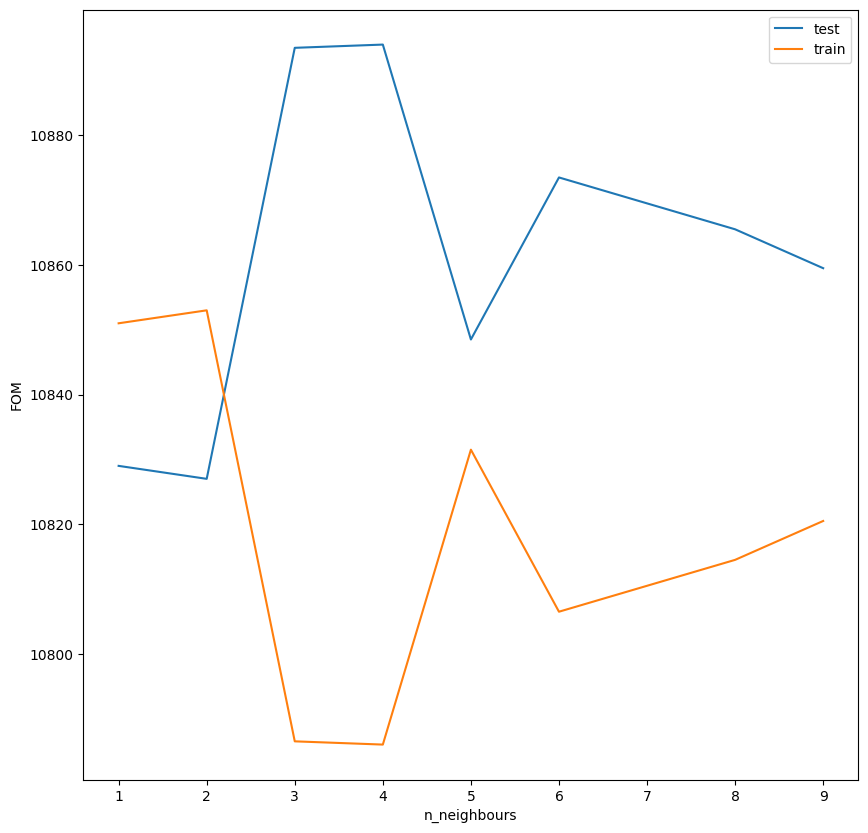

In [6]:
feats=['E','NrHits','E1E9','E9E25','Z20','LatMom']

#kN Optimizing
k_vals = np.arange(1,10,1)
kNfoms=ML(dataset,feats,k_vals,KNeighborsClassifier)

#Plotting kN
plt.figure(figsize = (10,10))
plt.plot(k_vals, kNfoms[0], label = "test")
plt.plot(k_vals, kNfoms[1], label = "train")
plt.xlabel("n_neighbours" )
plt.ylabel("FOM")
plt.legend()
fig=plt.gcf()
plt.show()
fig.savefig(f"kNfoms")

C:\Users\joaop\AppData\Local\Temp\ipykernel_19284\2266383789.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(np.array(X_train), np.array(Y_train))
C:\Users\joaop\AppData\Local\Temp\ipykernel_19284\2266383789.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(np.array(X_train), np.array(Y_train))
C:\Users\joaop\AppData\Local\Temp\ipykernel_19284\2266383789.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(np.array(X_train), np.array(Y_train))
C:\Users\joaop\AppData\Local\Temp\ipykernel_19284\2266383789.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

test:  9 10865.0
train:  3 10913.5


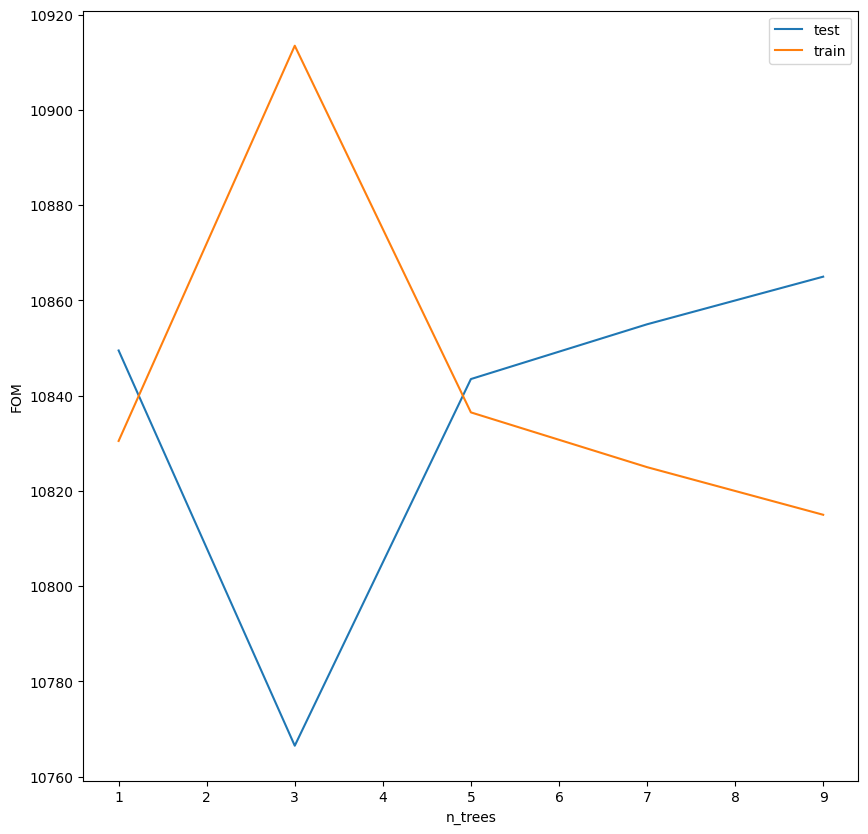

In [5]:
feats=['E','NrHits','E1E9','E9E25','Z20','LatMom']

#RF Optimizing
trees = np.arange(1,10,2)
criter="gini"
RFfoms=ML(dataset,feats,trees,RandomForestClassifier,criterion=criter)

#Plotting RF

plt.figure(figsize = (10,10))
plt.plot(trees, RFfoms[0], label = "test")
plt.plot(trees, RFfoms[1], label = "train")
plt.xlabel("n_trees" )
plt.ylabel("FOM")
plt.legend()
fig=plt.gcf()
plt.show()
fig.savefig(f"RF({criter})1")

In [ ]:
layersizes=np.arange(1,11,1)
MLPfoms=ML(dataset,feats,layersizes,MLPClassifier,solver='lbfgs',activation='logistic',max_iter=5000)  